# The steps we will follow in this exercise are as follows:
1.Reading, Understanding the data

2.Preparing the data for modeling (train-test split, rescalling etc.)

3.Training the Model

4.Predictions and evalution on the test set

5.Train a variety of models, tune model hyperparameters, etc

6.Evaluate the models using appropriate evaluation metrics

7-SMOTE + PCA for dimension reduction + Logistic Regression

# Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Tel_churn = pd.read_csv('telecom_churn_data.csv')
Tel_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
Tel_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
len(Tel_churn)

99999

In [5]:
##Checking Duplicate values
Tel_churn=Tel_churn.drop_duplicates(keep='first', inplace=False)
print(Tel_churn.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 173.2+ MB
None


In [6]:
Tel_churn.shape

(99999, 226)

In [7]:
Tel_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Cleaning Data

# Drop Columnwise missing values

In [8]:
# finding Null Values:
Tel_churn.isnull().sum().sort_values(ascending=False)

arpu_3g_6            74846
night_pck_user_6     74846
total_rech_data_6    74846
arpu_2g_6            74846
max_rech_data_6      74846
                     ...  
max_rech_amt_7           0
max_rech_amt_6           0
total_rech_amt_9         0
total_rech_amt_8         0
sep_vbc_3g               0
Length: 226, dtype: int64

In [9]:
### more than 30 % drop the missing values

print(Tel_churn.isna().sum()/len(Tel_churn.index))
Percentage_of_null = len(Tel_churn) * .70
Tel_churn1 = Tel_churn.dropna(thresh=Percentage_of_null,axis=1)
print((Tel_churn1.isna().sum()/len(Tel_churn.index)*100))

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    0.01018
std_og_t2o_mou    0.01018
loc_ic_t2o_mou    0.01018
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64
mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 186, dtype: float64


In [10]:
# Dropping _9 columns
Tel_churn1=Tel_churn1.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)
drop_col9 = [col for col in Tel_churn1.columns if '9' in col]
four_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
drop_col9_list=list(set(drop_col9)-set(four_col))
drop_col9_list

['loc_og_mou_9',
 'isd_og_mou_9',
 'spl_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'std_og_t2t_mou_9',
 'roam_ic_mou_9',
 'sachet_2g_9',
 'total_rech_amt_9',
 'std_ic_mou_9',
 'loc_og_t2t_mou_9',
 'total_rech_num_9',
 'onnet_mou_9',
 'date_of_last_rech_9',
 'monthly_2g_9',
 'last_day_rch_amt_9',
 'loc_og_t2f_mou_9',
 'std_ic_t2m_mou_9',
 'spl_og_mou_9',
 'std_ic_t2f_mou_9',
 'last_date_of_month_9',
 'std_ic_t2o_mou_9',
 'offnet_mou_9',
 'std_og_t2m_mou_9',
 'ic_others_9',
 'sachet_3g_9',
 'arpu_9',
 'std_og_t2c_mou_9',
 'monthly_3g_9',
 'loc_og_t2c_mou_9',
 'loc_ic_t2m_mou_9',
 'std_og_mou_9',
 'std_og_t2f_mou_9',
 'loc_ic_t2t_mou_9',
 'max_rech_amt_9',
 'loc_ic_mou_9',
 'loc_og_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'isd_ic_mou_9',
 'og_others_9',
 'roam_og_mou_9']

In [11]:
# dropped _9 columns
Tel_churn1=Tel_churn1.drop(drop_col9_list,axis=1)


# Droping Row wise missing values

In [12]:
Tel_churn1=Tel_churn1.fillna(0)
Tel_churn1=Tel_churn1.reset_index(drop=True)
print(Tel_churn1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 143 entries, mobile_number to sep_vbc_3g
dtypes: float64(113), int64(27), object(3)
memory usage: 109.1+ MB
None


In [13]:
print(Tel_churn1.head())
print(len(Tel_churn1.columns))

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.385   
1            6/30/2014            7/31/2014            8/31/2014   34.047   
2            6/30/2014            7/31/2014            8/31/2014  167.690   
3            6/30/2014            7/31/2014            8/31/2014  221.338   
4            6/30/2014            7/31/2014            8/31/2014  261.636   

    arpu_7  ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  sach

In [14]:
# Dropping columns where we have only 1 unique value
Tel_churn2=Tel_churn1.drop(Tel_churn1.columns[Tel_churn1.apply(lambda col: col.nunique()==1)], axis=1)
Tel_churn2=Tel_churn2.drop(['mobile_number'],axis=1)
print(len(Tel_churn2.columns))
print(Tel_churn2.columns)
Tel_churn2.to_csv("telecom_p.csv")

131
Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=131)


# Churn Tagging

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
Tel_churn2['two_mnth_avg_rev']=(Tel_churn2['total_rech_amt_6']+Tel_churn2['total_rech_amt_7'])/2

<AxesSubplot:xlabel='total_rech_amt_6', ylabel='Density'>

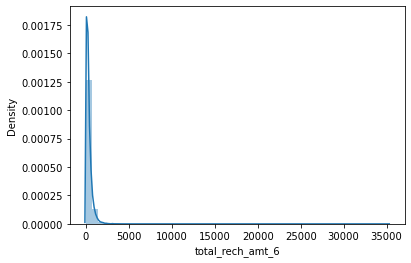

In [17]:
sns.distplot(Tel_churn2['total_rech_amt_6'])

<AxesSubplot:xlabel='total_rech_amt_7', ylabel='Density'>

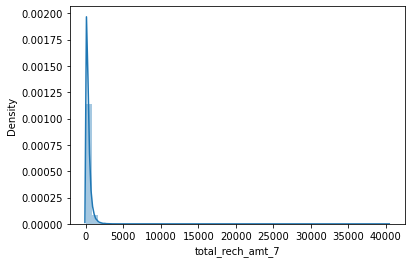

In [18]:
sns.distplot(Tel_churn2['total_rech_amt_7'])


<AxesSubplot:xlabel='two_mnth_avg_rev', ylabel='Density'>

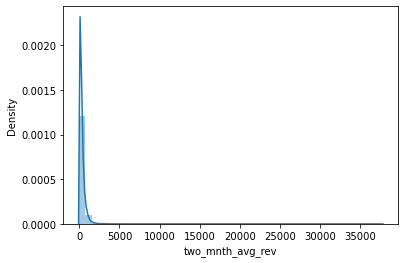

In [19]:
sns.distplot(Tel_churn2['two_mnth_avg_rev'])


In [20]:
np.percentile(Tel_churn2['two_mnth_avg_rev'],70)

368.5

In [21]:
Tel_churn3=Tel_churn2.loc[Tel_churn2.two_mnth_avg_rev>=368.5,:]
Tel_churn3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 132 entries, last_date_of_month_7 to two_mnth_avg_rev
dtypes: float64(105), int64(25), object(2)
memory usage: 30.5+ MB


In [22]:
Tel_churn3['two_month_2g_3g_9_uauage']=Tel_churn3['total_ic_mou_9']+Tel_churn3['total_og_mou_9']+Tel_churn3['vol_2g_mb_9']+Tel_churn3['vol_3g_mb_9']

<AxesSubplot:xlabel='two_month_2g_3g_9_uauage', ylabel='Density'>

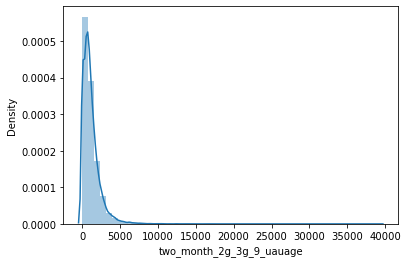

In [23]:
sns.distplot(Tel_churn3['two_month_2g_3g_9_uauage'])

In [24]:
Tel_churn3['churn_status']=Tel_churn3['two_month_2g_3g_9_uauage'].apply(lambda x: 1 if x <=0 else 0)

In [25]:
### dropping _9 variable

drop_col9_1 = [col for col in Tel_churn3.columns if '9' in col]
drop_col9_1

['total_og_mou_9',
 'total_ic_mou_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'two_month_2g_3g_9_uauage']

In [26]:
Tel_churn4=Tel_churn3.drop(drop_col9_1,axis=1)
Tel_churn4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 129 entries, last_date_of_month_7 to churn_status
dtypes: float64(101), int64(26), object(2)
memory usage: 29.8+ MB


In [27]:
Tel_churn4.columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'two_mnth_avg_rev',
       'churn_status'],
      dtype='object', length=129)

In [28]:
contineous_var=Tel_churn4.describe().columns
cat_var=set(Tel_churn4.columns)-set(contineous_var)

In [29]:
# univariate analysis of Continious variable
Tel_churn4.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,two_mnth_avg_rev,churn_status
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,...,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.086402
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,...,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.280961
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000
25%,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,135.680000,95.695000,0.000000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000
50%,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,281.940000,240.940000,0.000000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,29.000000,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,1.000000


In [30]:
Tel_churn4.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,two_mnth_avg_rev,churn_status
arpu_6,1.000000,0.631581,0.570936,0.291288,0.142431,0.116476,0.459309,0.257895,0.209238,0.109162,...,0.046507,0.028326,0.023618,-0.006226,0.122959,0.123912,0.173104,0.066414,0.868980,0.063513
arpu_7,0.631581,1.000000,0.740811,0.140501,0.269474,0.217865,0.274695,0.440144,0.341654,0.071475,...,0.025969,0.059566,0.040368,-0.017245,0.146881,0.170103,0.114663,0.080661,0.890903,-0.025660
arpu_8,0.570936,0.740811,1.000000,0.089217,0.185214,0.315016,0.208737,0.323614,0.493213,0.068859,...,0.018555,0.036902,0.076759,0.032472,0.194868,0.137574,0.119829,0.124008,0.737228,-0.182294
onnet_mou_6,0.291288,0.140501,0.089217,1.000000,0.719356,0.585589,0.008401,-0.050378,-0.041638,0.006130,...,-0.029577,-0.021964,-0.030215,-0.087617,-0.085559,-0.091655,-0.083181,-0.030021,0.229434,0.074631
onnet_mou_7,0.142431,0.269474,0.185214,0.719356,1.000000,0.793390,-0.034610,0.003817,0.005408,0.018306,...,-0.031152,-0.027272,-0.024172,-0.095001,-0.082477,-0.087765,-0.089319,-0.029211,0.227917,0.007139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,0.123912,0.170103,0.137574,-0.091655,-0.087765,-0.071002,-0.072229,-0.074112,-0.047176,0.008385,...,0.090188,0.082814,0.067555,0.028173,0.710976,1.000000,0.684767,0.166819,0.152340,-0.048225
jun_vbc_3g,0.173104,0.114663,0.119829,-0.083181,-0.089319,-0.067962,-0.058801,-0.074060,-0.049400,0.022327,...,0.081590,0.072926,0.063063,0.019177,0.595241,0.684767,1.000000,0.153393,0.144399,-0.031403
sep_vbc_3g,0.066414,0.080661,0.124008,-0.030021,-0.029211,-0.023576,-0.011934,-0.013445,-0.002315,0.010396,...,0.072138,0.056910,0.062348,0.013342,0.208195,0.166819,0.153393,1.000000,0.074067,-0.039560
two_mnth_avg_rev,0.868980,0.890903,0.737228,0.229434,0.227917,0.189888,0.396131,0.388943,0.314322,0.098522,...,0.035079,0.044061,0.031252,-0.008322,0.139873,0.152340,0.144399,0.074067,1.000000,0.016692


In [31]:
contineous_var=Tel_churn4.describe()
len(contineous_var.columns)

127

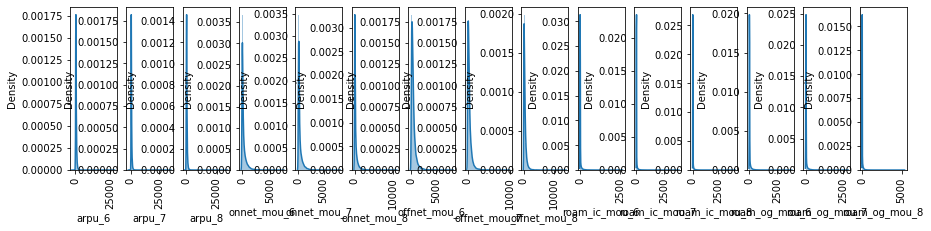

In [32]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(0,15):
    plt.subplot(1, 15, i+1)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

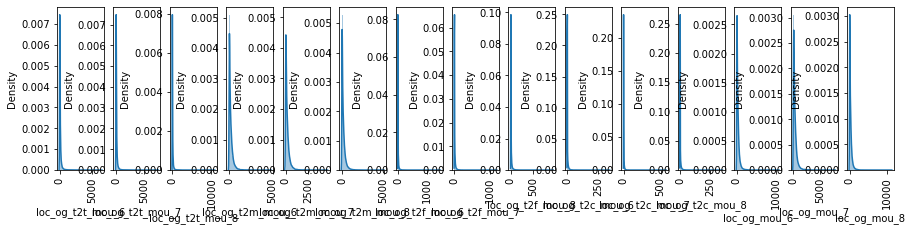

In [33]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(15,30):
    plt.subplot(1, 15, i-14)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

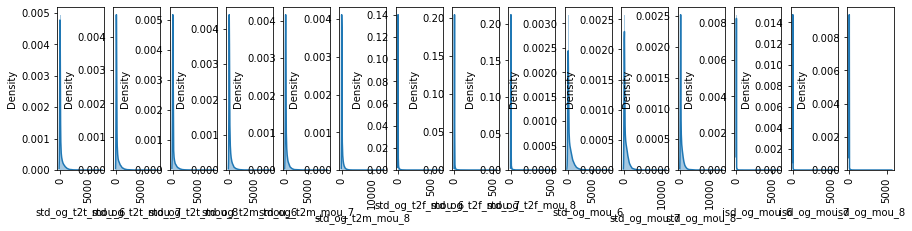

In [34]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(30,45):
    plt.subplot(1, 15, i-29)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

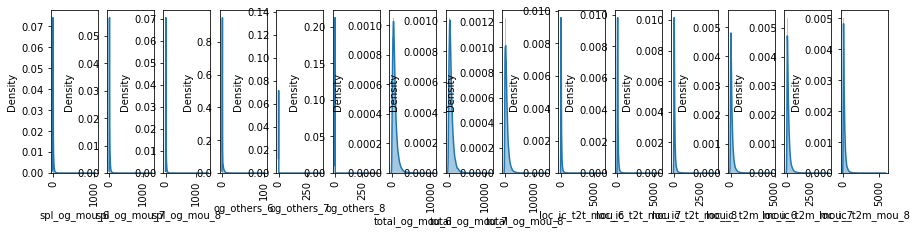

In [35]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(45,60):
    plt.subplot(1, 15, i-44)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

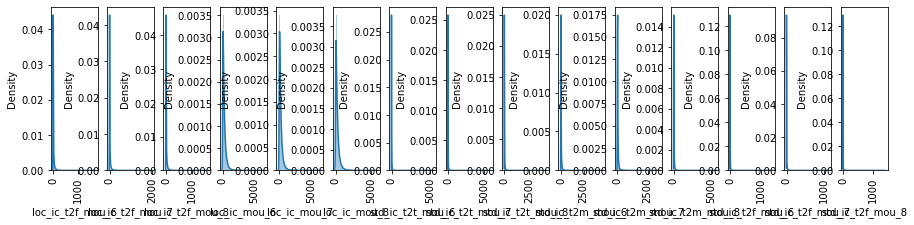

In [36]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(60,75):
    plt.subplot(1, 15, i-59)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

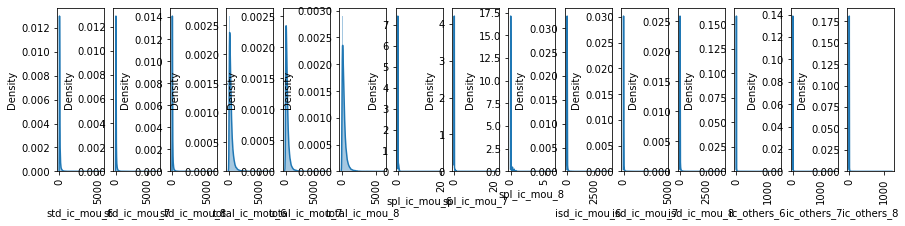

In [37]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(75,90):
    plt.subplot(1, 15, i-74)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

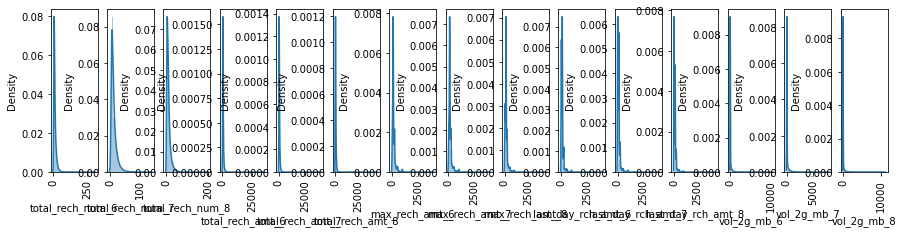

In [38]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(90,105):
    plt.subplot(1, 15, i-89)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

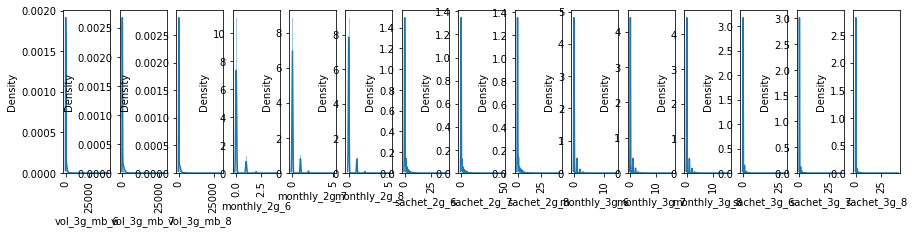

In [39]:
import seaborn as sns
plt.figure(figsize=(15,3))
for i in range(105,120):
    plt.subplot(1, 15, i-104)
    plt.xticks(rotation=90)
    sns.distplot(Tel_churn4[contineous_var.columns[i]])

# Bivariate Analysis between churn and Numeric Variable

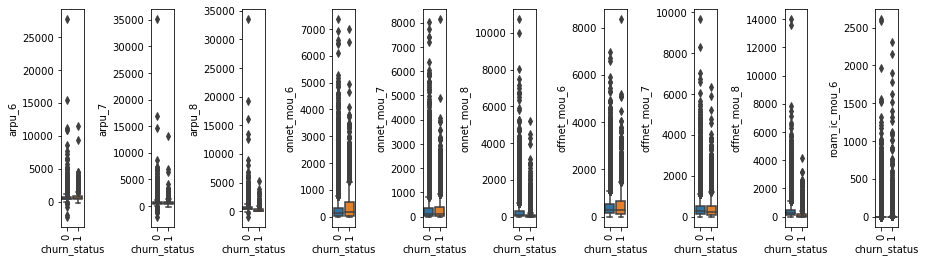

In [40]:
plt.figure(figsize=(15,4))
for i in range(0,10):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

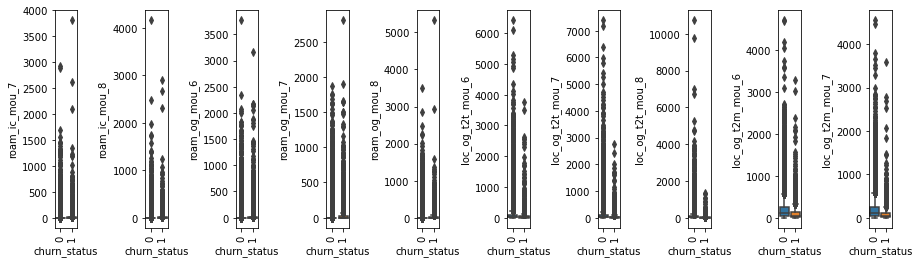

In [41]:
plt.figure(figsize=(15,4))
for i in range(10,20):
    plt.subplot(1, 10, i-9)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

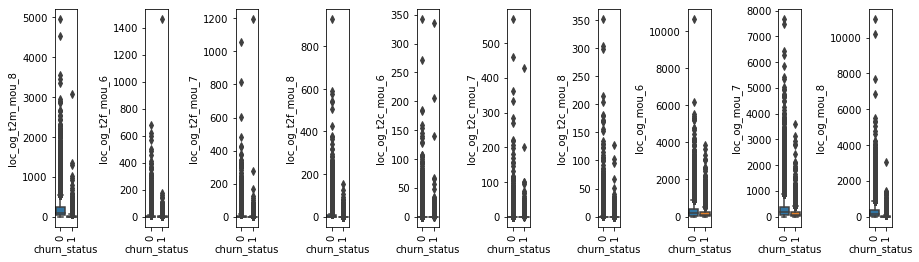

In [42]:
plt.figure(figsize=(15,4))
for i in range(20,30):
    plt.subplot(1, 10, i-19)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

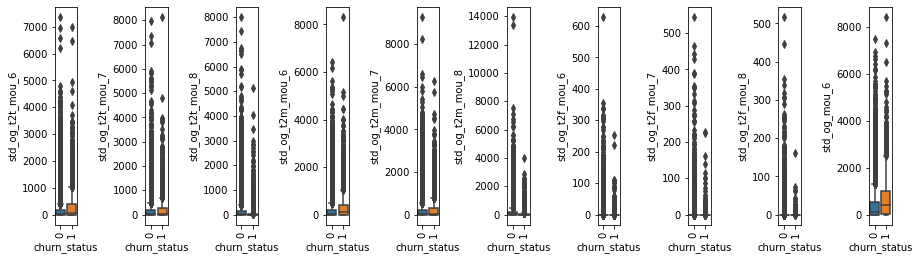

In [43]:
plt.figure(figsize=(15,4))
for i in range(30,40):
    plt.subplot(1, 10, i-29)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

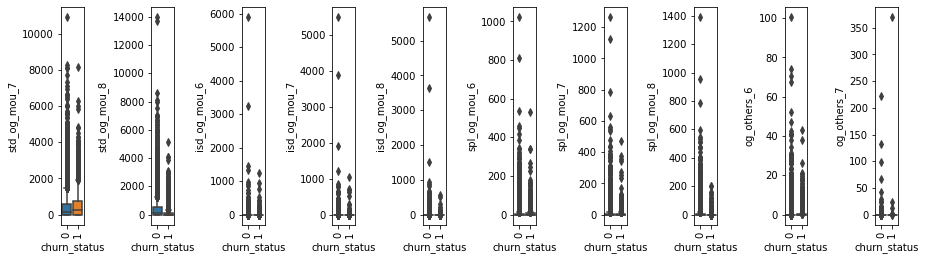

In [44]:
plt.figure(figsize=(15,4))
for i in range(40,50):
    plt.subplot(1, 10, i-39)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

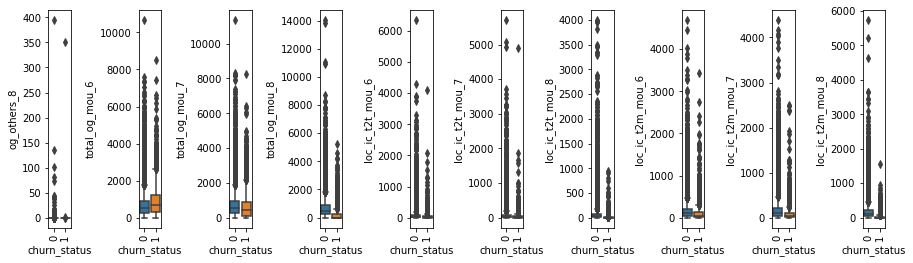

In [45]:
plt.figure(figsize=(15,4))
for i in range(50,60):
    plt.subplot(1, 10, i-49)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

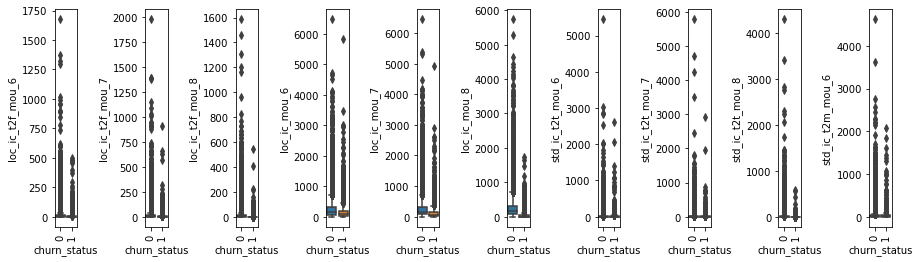

In [46]:
plt.figure(figsize=(15,4))
for i in range(60,70):
    plt.subplot(1, 10, i-59)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

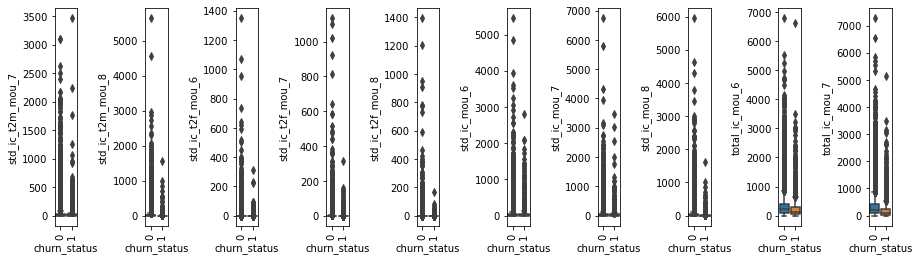

In [47]:
plt.figure(figsize=(15,4))
for i in range(70,80):
    plt.subplot(1, 10, i-69)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

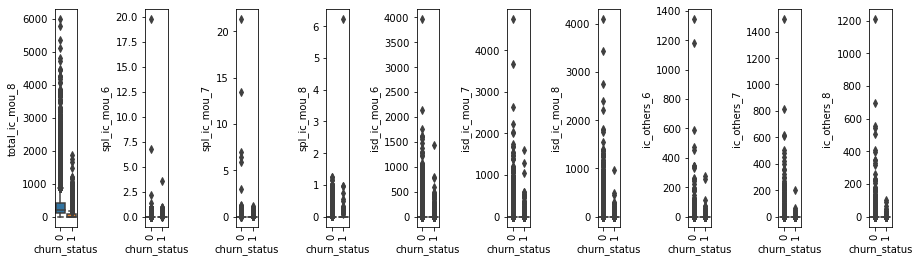

In [48]:
plt.figure(figsize=(15,4))
for i in range(80,90):
    plt.subplot(1, 10, i-79)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

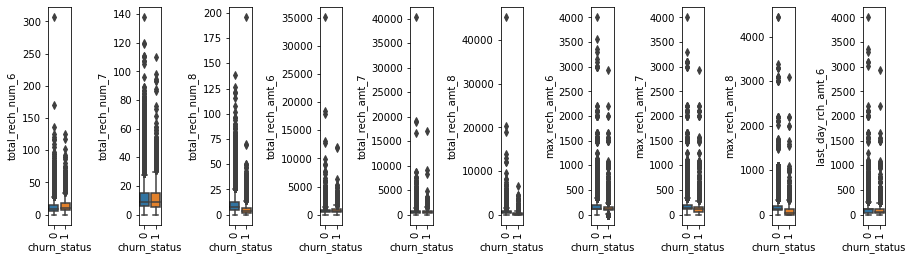

In [49]:
plt.figure(figsize=(15,4))
for i in range(90,100):
    plt.subplot(1, 10, i-89)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

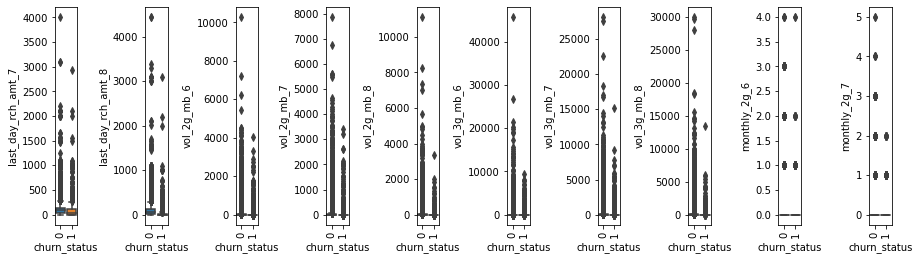

In [50]:
plt.figure(figsize=(15,4))
for i in range(100,110):
    plt.subplot(1, 10, i-99)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

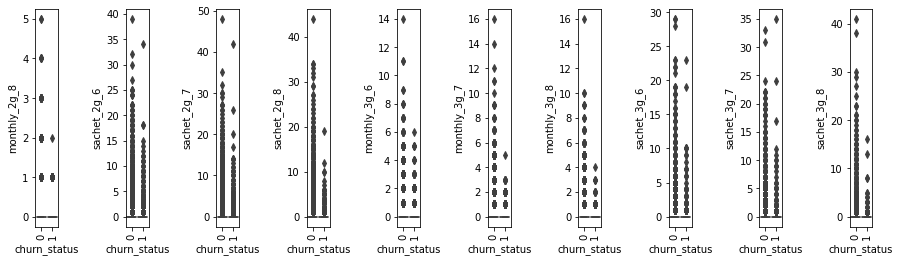

In [51]:
plt.figure(figsize=(15,4))
for i in range(110,120):
    plt.subplot(1, 10, i-109)
    sns.boxplot(y=Tel_churn4[contineous_var.columns[i]],x=Tel_churn4['churn_status'],data=Tel_churn4)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

# Feature Selection

In [52]:
Tel_churn4.info()
Tel_churn4=Tel_churn4.drop(['last_date_of_month_7','last_date_of_month_8'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 129 entries, last_date_of_month_7 to churn_status
dtypes: float64(101), int64(26), object(2)
memory usage: 29.8+ MB


In [53]:
Tel_churn5=Tel_churn4.drop(['churn_status'],axis=1)
normalized_df=(Tel_churn5-Tel_churn5.mean())/Tel_churn5.std()
telecom = pd.concat([Tel_churn4[['churn_status']],normalized_df],axis=1)
telecom=telecom.reset_index(drop=True)
telecom.head()

,churn_status,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,two_mnth_avg_rev
0,1,1.088482,1.643375,5.356163,-0.516942,-0.518209,-0.461484,0.075430,0.294405,-0.102854,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.473785,-0.183620,-0.283677,-0.263315,-0.134927,0.999087
1,0,-0.471093,-0.209360,-0.807492,0.255342,0.096905,-0.498371,-0.686955,-0.705604,-0.499575,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.973137,-0.277633,1.900678,0.002051,-0.134927,-0.363484
2,0,-0.213313,-0.828400,0.118642,0.446477,-0.406727,0.571500,-0.009825,-0.626163,0.225007,...,-0.297124,-0.157523,-0.154971,-0.144056,1.376998,-0.331490,-0.331174,-0.311400,-0.134927,-0.647864
3,0,-0.353064,-0.624903,-0.704838,-0.532850,-0.478087,-0.422218,-0.258492,-0.399125,-0.444537,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.772166,-0.331490,-0.325170,-0.255232,-0.134927,-0.486238
4,0,0.232027,-1.231709,-1.034735,1.931256,-0.612443,-0.556863,-0.757123,-0.871331,-0.773801,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.612209,-0.331490,-0.331174,-0.311400,-0.134927,-0.590579


# Checking the Churn Rate

In [54]:
churn = (sum(telecom['churn_status'].apply(lambda x: int(x)))/len(telecom['churn_status'].index))*100
churn

8.64016527273333

# Model building

In [55]:
# Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['churn_status'],axis=1)

# Putting response variable to y
y = telecom['churn_status']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn_status, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [57]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20881
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3878.0
Date:                Mon, 17 Apr 2023   Deviance:                       7756.1
Time:                        20:28:15   Pearson chi2:                 9.06e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1982
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9835      0.074    -54.100      0.000      -4.128      -3.839
arpu_6                 0.1999      0.113      1.776      0.076      -0.021       0.420
arpu_7                 0.2056      0.132      1.562      0.118      -0.052       0.464
arpu_8                 0.1007      0.178      0.566      0.571      -0.248       0.449
onnet_mou_6           -1.1633      2.992     -0.389      0.697      -7.028       4.701
onnet_mou_7           -1.6516      2.118     -0.780      0.436      -5.804       2.500
onnet_mou_8            0.4642      1.706      0.272      0.786      -2.879       3.808
offnet_mou_6          -0.7766      3.038     -0.256      0.798      -6.730       5.177
offnet_mou_7          -1.6725      2.092     -0.799      0.424      -5.773       2.428
offnet_mou_8          -0.2608      1.723     -0.151      0.880      -3.638       3.117
roam_ic_mou_6          0.0271      0.034      0.787      0.431      -0.040       0.094
roam_ic_mou_7          0.0319      0.037      0.857      0.392      -0.041       0.105
roam_ic_mou_8         -0.0299      0.037     -0.808      0.419      -0.103       0.043
roam_og_mou_6          0.2750      0.768      0.358      0.720      -1.231       1.781
roam_og_mou_7          0.3669      0.425      0.864      0.388      -0.465       1.199
roam_og_mou_8         -0.0177      0.384     -0.046      0.963      -0.771       0.736
loc_og_t2t_mou_6     187.6970   1304.319      0.144      0.886   -2368.721    2744.115
loc_og_t2t_mou_7    1116.6691   1373.453      0.813      0.416   -1575.250    3808.588
loc_og_t2t_mou_8    7878.7092   1510.411      5.216      0.000    4918.359    1.08e+04
loc_og_t2m_mou_6     197.7667   1377.467      0.144      0.886   -2502.019    2897.552
loc_og_t2m_mou_7    1083.3297   1332.438      0.813      0.416   -1528.201    3694.861
loc_og_t2m_mou_8    7884.0604   1511.318      5.217      0.000    4921.931    1.08e+04
loc_og_t2f_mou_6      17.9616    124.827      0.144      0.886    -226.694     262.618
loc_og_t2f_mou_7     101.6537    125.038      0.813      0.416    -143.415     346.723
loc_og_t2f_mou_8     678.8191    130.119      5.217      0.000     423.790     933.848
loc_og_t2c_mou_6      -0.0171      0.032     -0.536      0.592      -0.079       0.045
loc_og_t2c_mou_7       0.0995      0.044      2.264      0.024       0.013       0.186
loc_og_t2c_mou_8      -0.0287      0.046     -0.618      0.536      -0.120       0.062
loc_og_mou_6       -1393.1408   2565.205     -0.543      0.587   -6420.851    3634.570
loc_og_mou_7       -1799.6644   2701.902     -0.666      0.505   -7095.294    3495.966
loc_og_mou_8       -2328.1619   3046.315     -0.764      0.445   -8298.830    3642.506
std_og_t2t_mou_6    2410.4934   2637.679      0.914      0.361   -2759.263    7580.250
std_og_t2t_mou_7   -2034.3381   2816.4

# Model Building using RFE

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE   

In [60]:
rfe = RFE(logreg,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False])

In [62]:
rfe.ranking_

array([  1,   1,   1,  37,  58,  54,  74,  56,  17,  99,  55, 101,  40,
        20,  46,  19,  97,   6,   7, 108,  65,  72,  94,  93,  84,  32,
        83,   8,  98,   1,  38,  90,  45,  73,  18,  48,  67,  59,  22,
        39,  57,   1,  50,  49, 111, 102,  75,  31,  51,  95,  60, 100,
        69,  47,  92, 107,   9,  16,   4,   3, 103,  86,   1,  91,  25,
         1,  14,  52,  13,  87,  24,  26,  35,  66,  34,  82, 105,  43,
        42,   1,   1, 110,  30,   1,  70,  53,  80,  71,  23, 112,  88,
        27,   1,  96,  28,  41,  61,  29, 104, 109,  68,   1,  85,  36,
        15,  64,  79,  81,  12,  33,   1,  21, 106,   2,  77,  78,   1,
        89,  11,  10,   5,  44,  62,  63,   1,  76])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 37),
 ('onnet_mou_7', False, 58),
 ('onnet_mou_8', False, 54),
 ('offnet_mou_6', False, 74),
 ('offnet_mou_7', False, 56),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', False, 99),
 ('roam_ic_mou_7', False, 55),
 ('roam_ic_mou_8', False, 101),
 ('roam_og_mou_6', False, 40),
 ('roam_og_mou_7', False, 20),
 ('roam_og_mou_8', False, 46),
 ('loc_og_t2t_mou_6', False, 19),
 ('loc_og_t2t_mou_7', False, 97),
 ('loc_og_t2t_mou_8', False, 6),
 ('loc_og_t2m_mou_6', False, 7),
 ('loc_og_t2m_mou_7', False, 108),
 ('loc_og_t2m_mou_8', False, 65),
 ('loc_og_t2f_mou_6', False, 72),
 ('loc_og_t2f_mou_7', False, 94),
 ('loc_og_t2f_mou_8', False, 93),
 ('loc_og_t2c_mou_6', False, 84),
 ('loc_og_t2c_mou_7', False, 32),
 ('loc_og_t2c_mou_8', False, 83),
 ('loc_og_mou_6', False, 8),
 ('loc_og_mou_7', False, 98),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 38),
 ('std_og_t2t_mou_7', False, 90),
 ('std_o

In [64]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe
cols = X_train.columns[rfe.support_]
print(cols)
print(len(cols))

Index(['arpu_6', 'arpu_7', 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')
15


# Model-1

In [65]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4179.6
Date:                Mon, 17 Apr 2023   Deviance:                       8359.3
Time:                        20:30:05   Pearson chi2:                 3.18e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1748
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2300      0.079    -53.783      0.000      -4.384      -4.076
arpu_6                 0.3332      0.036      9.347      0.000       0.263       0.403
arpu_7                 0.3301      0.046      7.102      0.000       0.239       0.421
arpu_8                -0.3107      0.074     -4.180      0.000      -0.456      -0.165
loc_og_mou_8          -0.9208      0.124     -7.444      0.000      -1.163      -0.678
std_og_mou_8          -0.3969      0.056     -7.054      0.000      -0.507      -0.287
loc_ic_t2f_mou_8      -0.3161      0.141     -2.238      0.025      -0.593      -0.039
loc_ic_mou_8          -1.2202      0.213     -5.731      0.000      -1.637      -0.803
total_ic_mou_7         0.5376      0.060      8.950      0.000       0.420       0.655
total_ic_mou_8        -1.1498      0.180     -6.400      0.000      -1.502      -0.798
spl_ic_mou_8          -0.5408      0.078     -6.912      0.000      -0.694      -0.387
total_rech_num_8      -0.4543      0.054     -8.354      0.000      -0.561      -0.348
last_day_rch_amt_8    -0.6345      0.069     -9.258      0.000      -0.769      -0.500
monthly_2g_8          -0.5231      0.068     -7.640      0.000      -0.657      -0.389
monthly_3g_8          -0.5275      0.071     -7.440      0.000      -0.667      -0.389
sep_vbc_3g            -0.9400      0.248     -3.788      0.000      -1.426      -0.454
======================================================================================
"""

# Precdiction

In [66]:
# the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1434     0.077986
4636     0.000313
17998    0.015281
18683    0.064223
26470    0.009216
21505    0.013168
3762     0.153200
18121    0.013531
17011    0.062470
5067     0.004759
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07798631, 0.000313  , 0.01528094, 0.06422304, 0.00921575,
       0.01316777, 0.15320007, 0.01353117, 0.06246967, 0.00475925])

In [68]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.077986
1,0,0.000313
2,0,0.015281
3,0,0.064223
4,0,0.009216


In [69]:
#arbitrary cut-off probability point of 0.5 to find the predicted labels
# new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [70]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.077986,0
1,0,0.000313,0
2,0,0.015281,0
3,0,0.064223,0
4,0,0.009216,0


# Confusion matrix

In [71]:
from sklearn import metrics

In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18983   201]
 [ 1427   396]]


In [73]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9225020231351454


In [74]:
#VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,6.56
6,loc_ic_mou_8,5.36
2,arpu_8,3.22
7,total_ic_mou_7,3.09
1,arpu_7,2.30
0,arpu_6,1.64
4,std_og_mou_8,1.55
3,loc_og_mou_8,1.43
10,total_rech_num_8,1.43
11,last_day_rch_amt_8,1.29


In [76]:
cols = cols.drop(['loc_ic_mou_8','total_ic_mou_8'], 1)
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [77]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4329.0
Date:                Mon, 17 Apr 2023   Deviance:                       8658.0
Time:                        20:30:07   Pearson chi2:                 7.14e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1630
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1096      0.077    -53.177      0.000      -4.261      -3.958
arpu_6                 0.3675      0.036     10.323      0.000       0.298       0.437
arpu_7                 0.4462      0.045      9.975      0.000       0.359       0.534
arpu_8                -0.4351      0.076     -5.761      0.000      -0.583      -0.287
loc_og_mou_8          -2.0259      0.118    -17.101      0.000      -2.258      -1.794
std_og_mou_8          -0.4527      0.057     -7.996      0.000      -0.564      -0.342
loc_ic_t2f_mou_8      -1.0687      0.152     -7.010      0.000      -1.367      -0.770
total_ic_mou_7        -0.0392      0.038     -1.021      0.307      -0.115       0.036
spl_ic_mou_8          -0.5802      0.080     -7.284      0.000      -0.736      -0.424
total_rech_num_8      -0.5459      0.054    -10.021      0.000      -0.653      -0.439
last_day_rch_amt_8    -0.7029      0.069    -10.201      0.000      -0.838      -0.568
monthly_2g_8          -0.5536      0.068     -8.152      0.000      -0.687      -0.420
monthly_3g_8          -0.5699      0.072     -7.946      0.000      -0.711      -0.429
sep_vbc_3g            -0.9951      0.251     -3.967      0.000      -1.487      -0.504
======================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,arpu_8,3.16
1,arpu_7,2.27
0,arpu_6,1.64
4,std_og_mou_8,1.53
8,total_rech_num_8,1.43
3,loc_og_mou_8,1.31
9,last_day_rch_amt_8,1.29
6,total_ic_mou_7,1.22
11,monthly_3g_8,1.17
5,loc_ic_t2f_mou_8,1.11


In [79]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1434     0.078761
4636     0.000091
17998    0.011902
18683    0.029363
26470    0.015228
21505    0.024128
3762     0.181957
18121    0.020462
17011    0.052989
5067     0.002754
dtype: float64

In [80]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.87607496e-02, 9.08340847e-05, 1.19020912e-02, 2.93634051e-02,
       1.52279480e-02, 2.41280616e-02, 1.81957453e-01, 2.04615768e-02,
       5.29886751e-02, 2.75440092e-03])

In [81]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [82]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.078761,0
1,0,0.000091,0
2,0,0.011902,0
3,0,0.029363,0
4,0,0.015228,0


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.920169467320417


In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.2172243554580362

In [86]:
#calculate specificity
TN / float(TN+FP)

0.989522518765638

# Plotting the ROC Curve

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

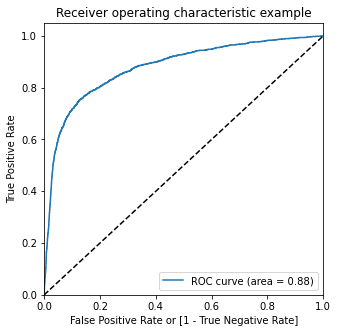

In [89]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# Finding Optimal Cutoff Point

In [90]:
# columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.078761,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000091,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011902,0,1,0,0,0,0,0,0,0,0,0
3,0,0.029363,0,1,0,0,0,0,0,0,0,0,0
4,0,0.015228,0,1,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086781  1.000000  0.000000
0.1   0.1  0.805731  0.799781  0.806297
0.2   0.2  0.894892  0.692814  0.914095
0.3   0.3  0.921455  0.586396  0.953294
0.4   0.4  0.925834  0.400439  0.975761
0.5   0.5  0.920169  0.161821  0.992233
0.6   0.6  0.916456  0.077345  0.996195
0.7   0.7  0.915219  0.035107  0.998853
0.8   0.8  0.914124  0.015908  0.999479
0.9   0.9  0.913648  0.006034  0.999896


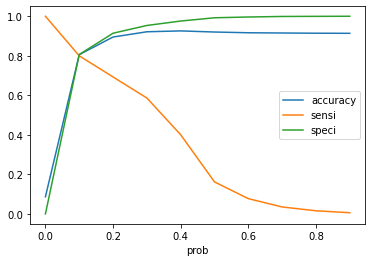

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.078761,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000091,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.011902,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.029363,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.015228,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.805731422859047

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15468,  3716],
       [  365,  1458]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7997805814591333

In [98]:
#calculate specificity
TN / float(TN+FP)

0.8062969140950792

# SMOTE + PCA for dimension reduction + Logistic Regression

In [99]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 27418), (1, 27418)]


In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [101]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [102]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

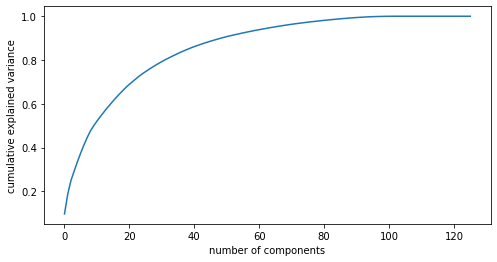

In [103]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [104]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [105]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38385, 55)

In [106]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

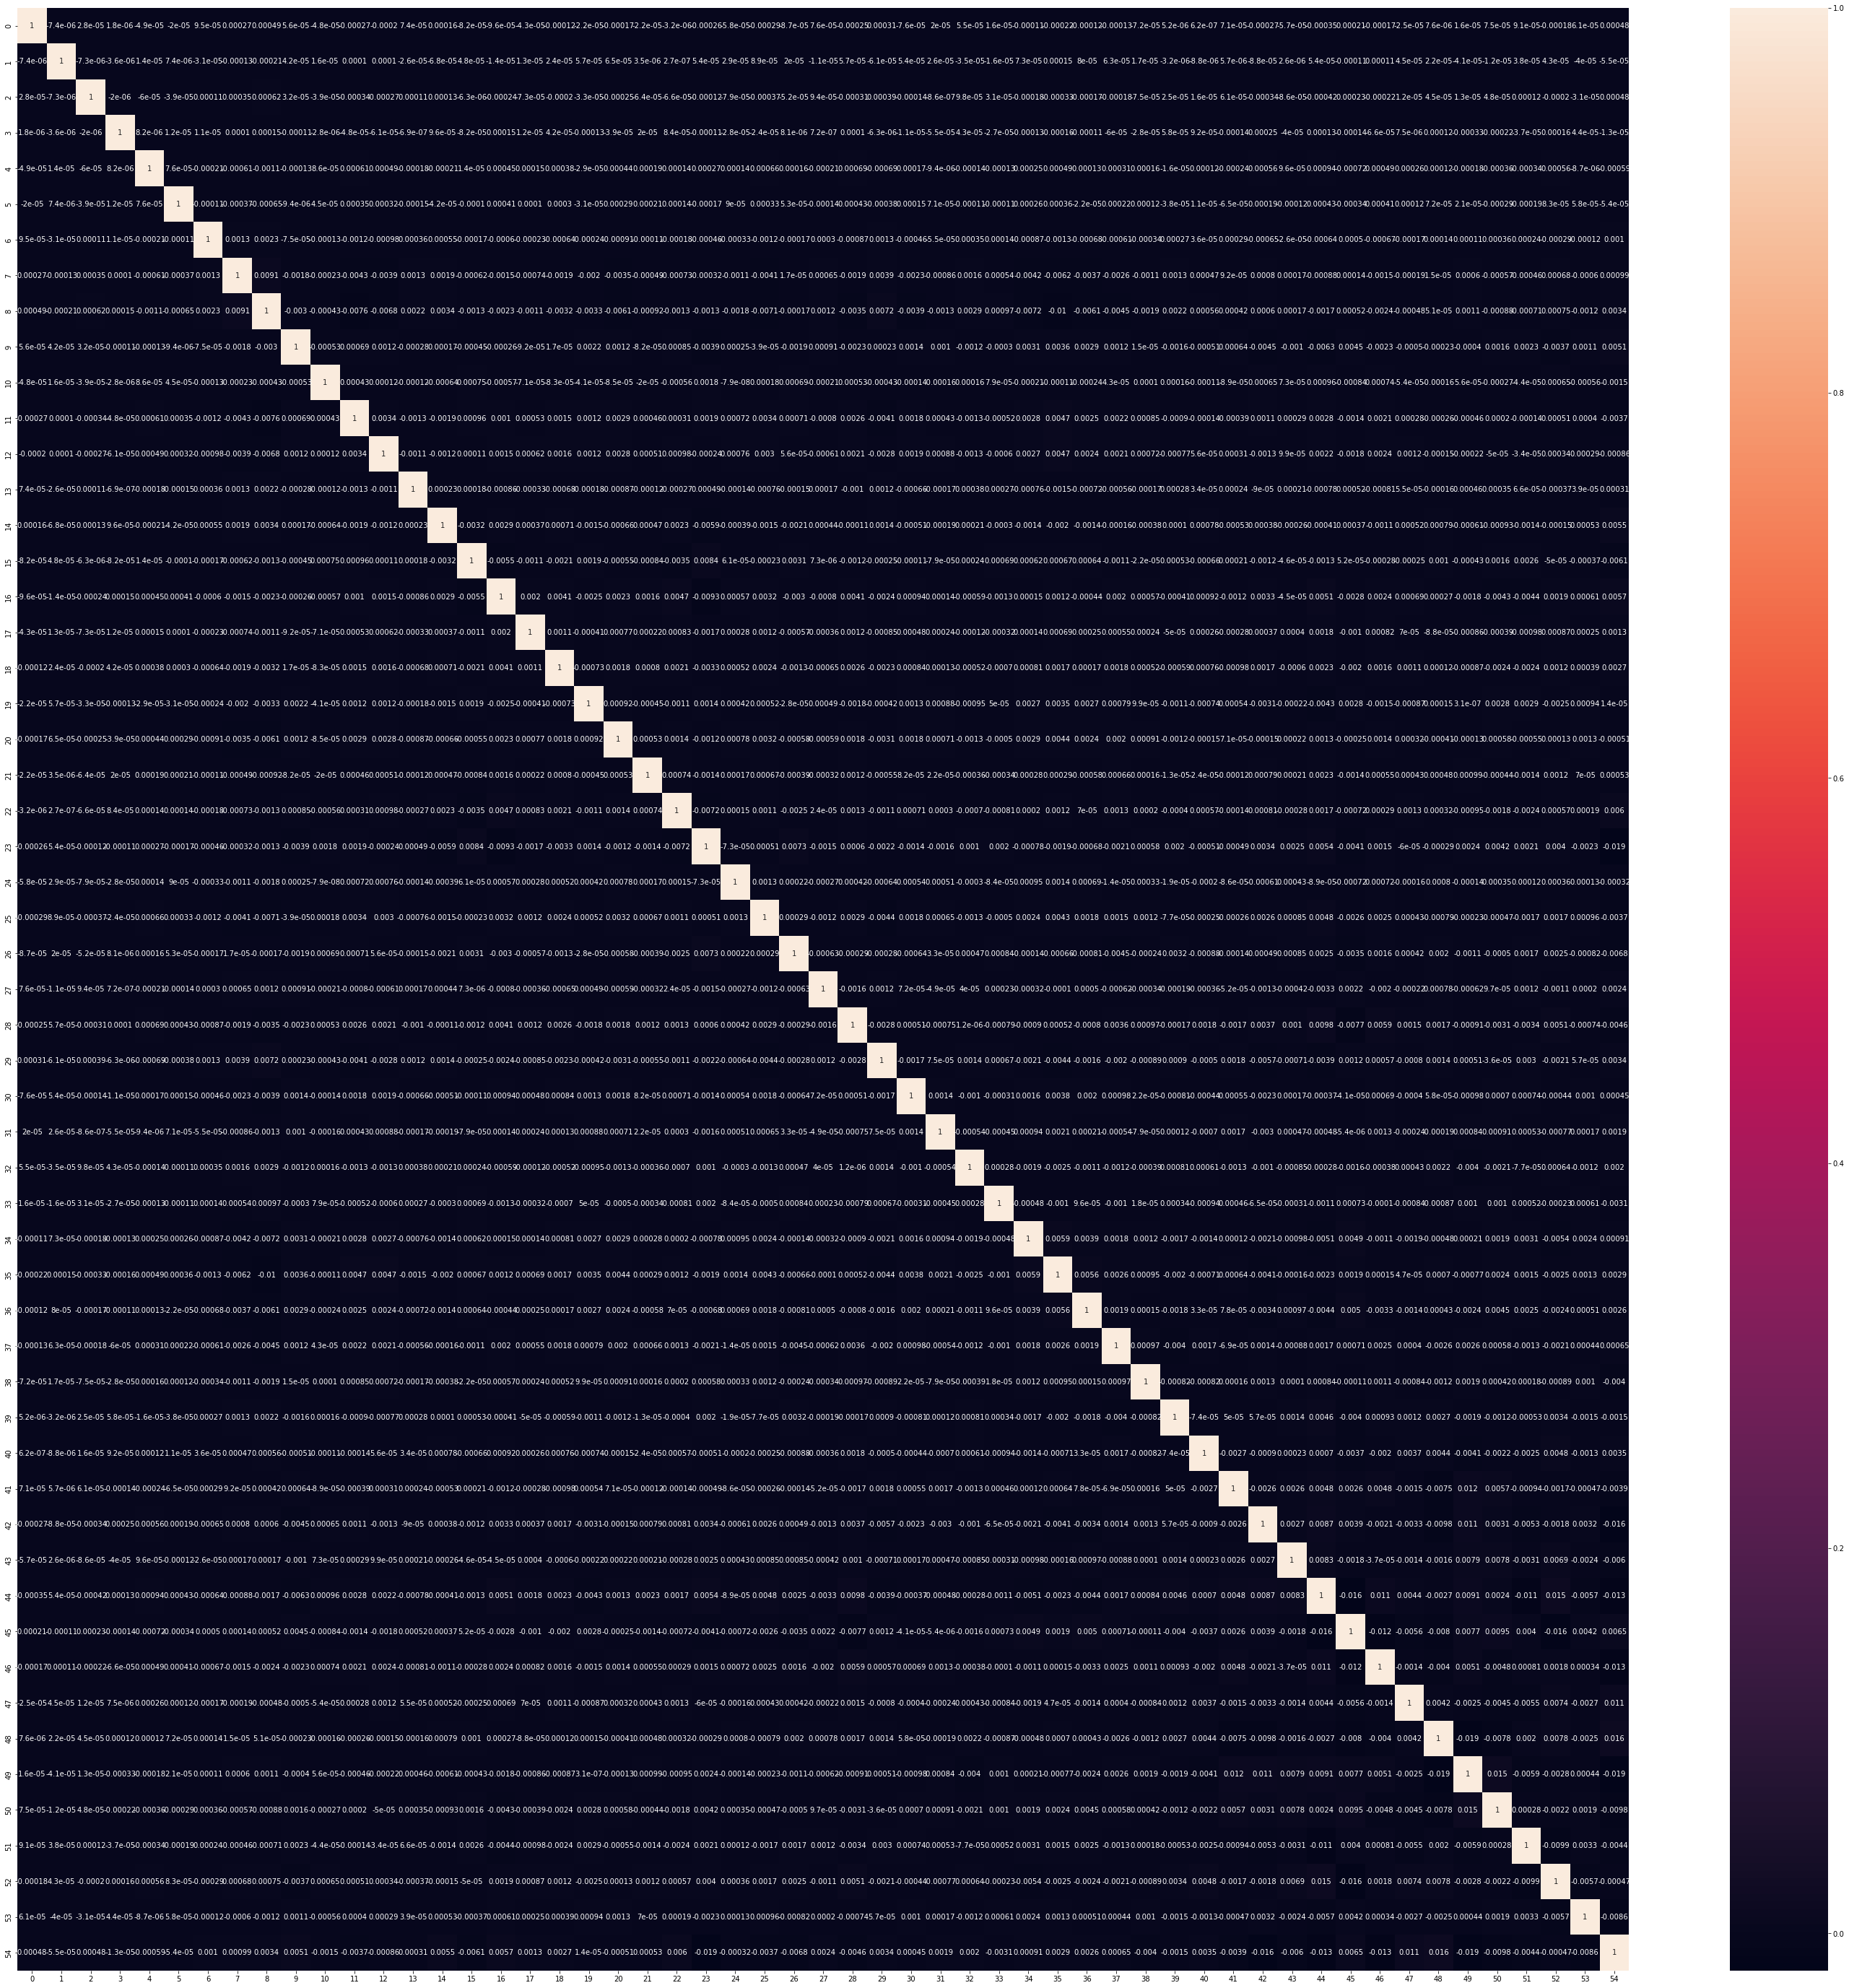

In [107]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,50))
sns.heatmap(corrmat,annot = True)

In [108]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are very close to 0

max corr: 0.016230544386308637 , min corr:  -0.01935490763349656


In [109]:
#Applying selected components to the test data - 55 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16451, 55)

In [110]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [111]:
#making prediction on train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.91'

In [112]:
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.078761,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000091,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.011902,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.029363,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.015228,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':pred_probs_train})
y_train_pred_final['pred_final_sta']=y_train_pred_final['Churn_Prob'].map(lambda x: 0 if x < 0.5 else 1)

In [114]:
from sklearn import metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.pred_final_sta )
confusion2

array([[15874,  3312],
       [ 2730, 16469]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8578050940153134

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

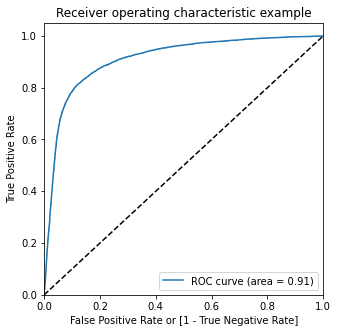

In [119]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# cutoff point

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,pred_final_sta,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
23364,0,0.000026,0,1,0,0,0,0,0,0,0,0,0
46141,1,0.618083,1,1,1,1,1,1,1,1,0,0,0
18234,0,0.194144,0,1,1,0,0,0,0,0,0,0,0
33837,1,0.880445,1,1,1,1,1,1,1,1,1,1,0
3882,0,0.862268,1,1,1,1,1,1,1,1,1,1,0


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500169  1.000000  0.000000
0.1   0.1  0.699857  0.974686  0.424841
0.2   0.2  0.761912  0.953487  0.570207
0.3   0.3  0.800834  0.927965  0.673616
0.4   0.4  0.827224  0.897182  0.757219
0.5   0.5  0.842595  0.857805  0.827374
0.6   0.6  0.846008  0.811032  0.881007
0.7   0.7  0.834545  0.749622  0.919525
0.8   0.8  0.790335  0.629929  0.950850
0.9   0.9  0.625661  0.270066  0.981497


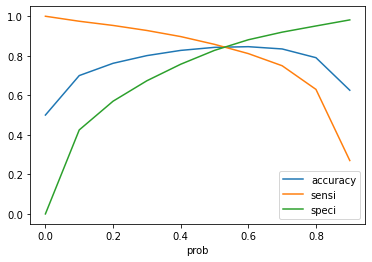

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,pred_final_sta,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
23364,0,0.000026,0,1,0,0,0,0,0,0,0,0,0,0
46141,1,0.618083,1,1,1,1,1,1,1,1,0,0,0,1
18234,0,0.194144,0,1,1,0,0,0,0,0,0,0,0,0
33837,1,0.880445,1,1,1,1,1,1,1,1,1,1,0,1
3882,0,0.862268,1,1,1,1,1,1,1,1,1,1,0,1


In [124]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion3

array([[15874,  3312],
       [ 2730, 16469]], dtype=int64)

In [125]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [126]:
# he sensitivity of our logistic regression model
TP / float(TP+FN)

0.8578050940153134

In [127]:
# calculate specificity
TN / float(TN+FP)

0.8273741269675805

In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8425947635795232

# Prediction on Test Dataset

In [129]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':pred_probs_test})
y_test_pred_final['pred_final_sta']=y_test_pred_final['Churn_Prob'].map(lambda x: 0 if x < 0.5 else 1)

In [130]:
#Making prediction on the test data
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.pred_final_sta)

0.8358154519482098

In [131]:
confusion4 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.pred_final_sta )
confusion4

array([[6712, 1520],
       [1181, 7038]], dtype=int64)

In [132]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8563085533519893

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.815354713313897

# SVC + PCA + SMOTE

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

linear_svc = SVC(kernel = 'linear', verbose = 10)
linear_svc.fit(df_train_pca, y_train)
pred_linsvc = linear_svc.predict(df_test_pca)

print('Accuracy:', accuracy_score(y_true = y_test, y_pred = pred_linsvc))
print(confusion_matrix(y_true = y_test, y_pred = pred_linsvc))

poly_svc = SVC(kernel = 'poly', verbose = 10)
poly_svc.fit(df_train_pca, y_train)
pred_poly = poly_svc.predict(df_test_pca)

print('Accuracy:', accuracy_score(y_true = y_test, y_pred = pred_poly))
print(confusion_matrix(y_true = y_test, y_pred = pred_poly))

rbf_svc = SVC(kernel = 'rbf', verbose = 10)
rbf_svc.fit(df_train_pca, y_train)
pred_rbf = rbf_svc.predict(df_test_pca)


print('Accuracy:', accuracy_score(y_true = y_test, y_pred = pred_rbf))
print(confusion_matrix(y_true = y_test, y_pred = pred_rbf))

[LibSVM]Accuracy: 0.8427451218770895
[[6926 1306]
 [1281 6938]]
[LibSVM]Accuracy: 0.8731384110388426
[[7158 1074]
 [1013 7206]]
[LibSVM]Accuracy: 0.8919822503191296
[[7280  952]
 [ 825 7394]]


# hyperparameter tuning

In [136]:
hyper_params = [ {'gamma': [1e-2, 1e-3],
                     'C': [1, 10]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 2, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train) 

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10], 'gamma': [0.01, 0.001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       4 non-null      float64
 1   std_fit_time        4 non-null      float64
 2   mean_score_time     4 non-null      float64
 3   std_score_time      4 non-null      float64
 4   param_C             4 non-null      object 
 5   param_gamma         4 non-null      object 
 6   params              4 non-null      object 
 7   split0_test_score   4 non-null      float64
 8   split1_test_score   4 non-null      float64
 9   mean_test_score     4 non-null      float64
 10  std_test_score      4 non-null      float64
 11  rank_test_score     4 non-null      int32  
 12  split0_train_score  4 non-null      float64
 13  split1_train_score  4 non-null      float64
 14  mean_train_score    4 non-null      float64
 15  std_train_score     4 non-null      float64
dtypes: float64(1

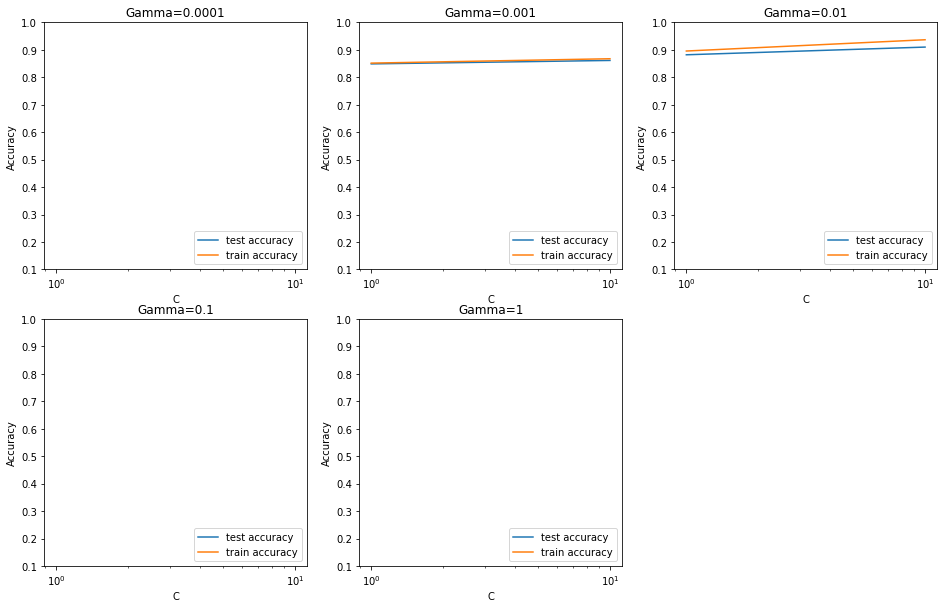

In [138]:
cv_results['param_C'] = cv_results['param_C'].astype('float')

plt.figure(figsize = (16, 10))

plt.subplot(231)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.10, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(232)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.10, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(233)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.10, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(234)
gamma_1 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_1["param_C"], gamma_1["mean_test_score"])
plt.plot(gamma_1["param_C"], gamma_1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.10, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.subplot(235)
gamma_10 = cv_results[cv_results['param_gamma']==1]

plt.plot(gamma_10["param_C"], gamma_10["mean_test_score"])
plt.plot(gamma_10["param_C"], gamma_10["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=1")
plt.ylim([0.10, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

In [140]:
best_score = model_cv.best_score_
best_hparams = model_cv.best_params_

print('best score = ', best_score, '\nbest params = ', best_hparams)

best score =  0.9100690318937706 
best params =  {'C': 10, 'gamma': 0.01}


In [141]:
final_svc_model = SVC(
    kernel = 'rbf', 
    verbose = 10,
    C = 10,
    gamma = 0.1
)

final_svc_model.fit(df_train_pca, y_train)
pred = final_svc_model.predict(df_test_pca)

print('Accuracy:', accuracy_score(y_true = y_test, y_pred = pred))
print(confusion_matrix(y_true = y_test, y_pred = pred))

[LibSVM]Accuracy: 0.9711263752963346
[[7917  315]
 [ 160 8059]]


In [142]:
TP = confusion_matrix(y_true = y_test, y_pred = pred)[1,1] # true positive 
TN = confusion_matrix(y_true = y_test, y_pred = pred)[0,0] # true negatives
FP = confusion_matrix(y_true = y_test, y_pred = pred)[0,1] # false positives
FN = confusion_matrix(y_true = y_test, y_pred = pred)[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9805329115464169

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9617346938775511

# Random Forest + PCA + SMOTE

In [145]:
#Default hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(df_train_pca, y_train)

RandomForestClassifier()

In [147]:
predictions_rfc = rfc.predict(df_test_pca)

In [148]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions_rfc))
# Printing confusion matrix and accuracy
confusion5 = confusion_matrix(y_test,predictions_rfc)
print('Confusion matrix:\n', confusion_matrix(y_test,predictions_rfc))
print('Accuracy:', accuracy_score(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8232
           1       0.93      0.96      0.95      8219

    accuracy                           0.95     16451
   macro avg       0.95      0.95      0.95     16451
weighted avg       0.95      0.95      0.95     16451

Confusion matrix:
 [[7648  584]
 [ 295 7924]]
Accuracy: 0.9465685976536381


In [149]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.9290573372206026

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9641075556637061

# Parameter tuning

In [152]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(df_train_pca, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [154]:
# finding the optimal accuracy score and hyperparameters
print('accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

accuracy of 0.8369935812167695 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [155]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=200)
# fit
rfc.fit(df_train_pca ,y_train)
# predict
predictions = rfc.predict(df_test_pca)

In [156]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      8232
           1       0.86      0.85      0.85      8219

    accuracy                           0.85     16451
   macro avg       0.85      0.85      0.85     16451
weighted avg       0.85      0.85      0.85     16451



In [158]:
confusion5 = confusion_matrix(y_test,predictions)
print(confusion5)

[[7051 1181]
 [1240 6979]]


In [161]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [162]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.8528356938787915


In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8491300644847305

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.8565354713313897

Here we compare the outcomes of the many models we created and choose the best one.

Models are:

Logistic Regression in imbalanced data

Logistic Regression in balanced data using SMOTE + PCA

Support Vector Classifier with SMOTE + PCA

Random Forest Classifier in balanced data using SMOTE + PCA

On the basis of prediction accuracy, sensitivity, specificity, and area under the curve, we will assess the models.

1. Logistic Regression in imbalanced data

Accuracy    = 80.57%  
Sensitivity = 79.98%  
Specificity = 80.62%  
2. Logistic Regression in balanced data using SMOTE + PCA

Accuracy    = 83.58%  
Sensitivity = 85.68%  
Specificity = 81.53%  
3. SVC with SMOTE + PCA

Accuracy    = 97.11%  
Sensitivity = 98.05%  
Specificity = 96.17%  
4. Random Forest Classifier in balanced data using SMOTE + PCA

Accuracy    = 85.28%  
Sensitivity = 84.91%  
Specificity = 85.65%

# Conclusion

Now that we have a model that can reasonably predict if a customer will leave, we can use it to create a list of the cellphone numbers of those consumers. Customers on this list should receive the proper promotions, incentives, or discounts.

From the interpretable model , the top 3 important features:

loc_og_t2m_mou_8 : -2.026

loc_ic_t2m_mou_8 : -1.069

sep_vbc_3g : -0.995